<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/sigorta_modeli_tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import all sklearn modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    datasets,
    model_selection,
    preprocessing,
    metrics,
    linear_model,
    tree,
    ensemble,
    svm,
    neighbors,
    naive_bayes,
    cluster,
    decomposition,
    manifold,
    feature_extraction,
    feature_selection,
    pipeline,
    calibration,
    gaussian_process,
    kernel_approximation,
    kernel_ridge,
    multioutput,
    semi_supervised,
    dummy,
    discriminant_analysis,
    exceptions,
    compose,
    utils,
)

# Import all keras modules
from keras.models import Sequential, Model
from keras.layers import (
    Dense,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dropout,
    Activation,
    Input,
    BatchNormalization,
    Embedding,
    SimpleRNN,
    LSTM,
    GRU,
)


In [12]:
testdf=pd.read_csv("/content/test.csv")

In [9]:
traindf=pd.read_csv("/content/train.csv")

In [10]:
traindf.head(3)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0


In [13]:
testdf.head(3)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo


In [31]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_variables(df):
    # Kategorik değişkenlerin otomatik tespiti
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    label_encoders = {}  # Her sütun için LabelEncoder nesnelerini saklamak için bir sözlük

    for column in categorical_columns:
        print(f"Encoding column: {column}")
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))  # Kategorik veriyi sayısala çevir
        label_encoders[column] = le  # LabelEncoder nesnesini sakla

    print("Tüm kategorik değişkenler dönüştürüldü!")
    return df, label_encoders

# Örnek kullanım
df, label_encoders = encode_categorical_variables(df)


Encoding column: Gender
Encoding column: Marital Status
Encoding column: Education Level
Encoding column: Occupation
Encoding column: Location
Encoding column: Policy Type
Encoding column: Policy Start Date
Encoding column: Customer Feedback
Encoding column: Smoking Status
Encoding column: Exercise Frequency
Encoding column: Property Type
Tüm kategorik değişkenler dönüştürüldü!


----- Genel Bilgiler -----
<class 'pandas.core.frame.DataFrame'>
Index: 739781 entries, 0 to 382385
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    739781 non-null  int64  
 1   Age                   728261 non-null  float64
 2   Gender                739781 non-null  int64  
 3   Annual Income         711997 non-null  float64
 4   Marital Status        739781 non-null  int64  
 5   Number of Dependents  672272 non-null  float64
 6   Education Level       739781 non-null  int64  
 7   Occupation            739781 non-null  int64  
 8   Health Score          694325 non-null  float64
 9   Location              739781 non-null  int64  
 10  Policy Type           739781 non-null  int64  
 11  Previous Claims       515618 non-null  float64
 12  Vehicle Age           739776 non-null  float64
 13  Credit Score          654540 non-null  float64
 14  Insurance Duration    739780 n

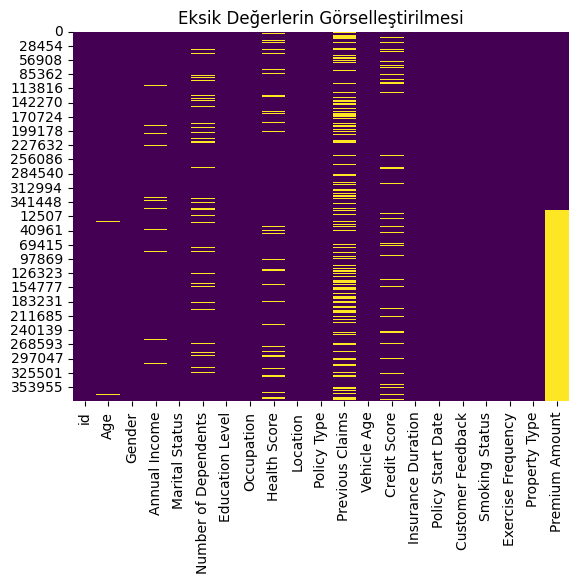


----- Sayısal Değişkenlerin Dağılımı -----


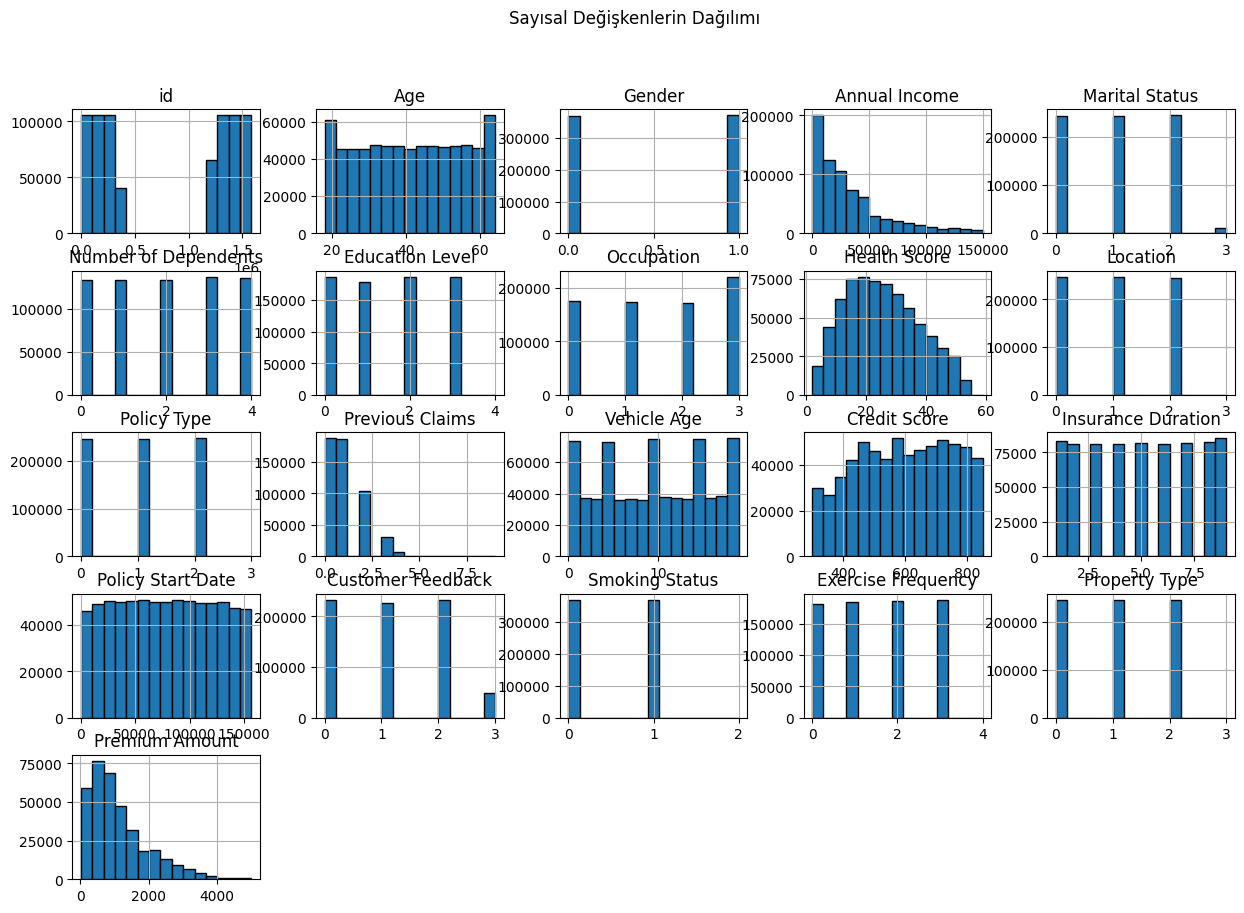


----- Kategorik Değişkenlerin Görselleştirilmesi -----

----- Korelasyon Matrisi -----


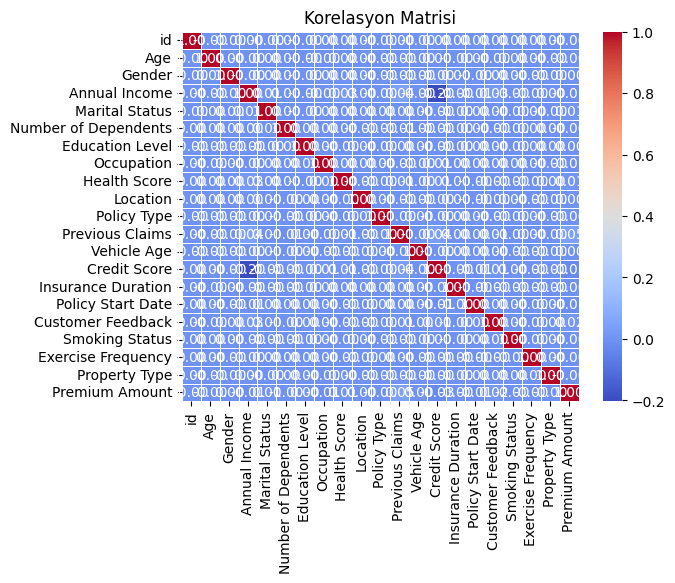


EDA tamamlandı!


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA Fonksiyonu
def perform_eda(df):
    print("----- Genel Bilgiler -----")
    print(df.info())  # Veri çerçevesinin temel bilgileri
    print("\n----- İlk 5 Satır -----")
    print(df.head())  # İlk 5 satır
    print("\n----- Eksik Değerler -----")
    print(df.isnull().sum())  # Eksik değerlerin toplamı

    print("\n----- Temel İstatistikler -----")
    print(df.describe(include="all"))  # Sayısal ve kategorik değişkenler için özet

    print("\n----- Benzersiz Değer Sayıları -----")
    print(df.nunique())  # Benzersiz değer sayısı

    # Eksik Değerlerin Görselleştirilmesi
    print("\n----- Eksik Değerlerin Görselleştirilmesi -----")
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Eksik Değerlerin Görselleştirilmesi")
    plt.show()

    # Sayısal Değişkenlerin Histogramları
    print("\n----- Sayısal Değişkenlerin Dağılımı -----")
    numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
    df[numeric_columns].hist(bins=15, figsize=(15, 10), edgecolor="black")
    plt.suptitle("Sayısal Değişkenlerin Dağılımı")
    plt.show()

    # Kategorik Değişkenlerin Görselleştirilmesi
    print("\n----- Kategorik Değişkenlerin Görselleştirilmesi -----")
    categorical_columns = df.select_dtypes(include=["object", "category"]).columns
    for column in categorical_columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=column, data=df, palette="viridis", order=df[column].value_counts().index)
        plt.title(f"Kategorik Değişken: {column}")
        plt.show()

    # Korelasyon Matrisi
    print("\n----- Korelasyon Matrisi -----")
    if len(numeric_columns) > 1:
        correlation_matrix = df[numeric_columns].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title("Korelasyon Matrisi")
        plt.show()
    else:
        print("Sayısal değişken sayısı birden az olduğundan korelasyon analizi yapılamıyor.")

    print("\nEDA tamamlandı!")

# Train ve Test birleştirildiğini varsayıyoruz

# Concat edilmiş veri üzerinde EDA
perform_eda(df)


In [32]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,0,10049.0,1,1.0,0,1,22.598761,2,...,2.0,17.0,372.0,5.0,136264,2,0,3,2,2869.0
1,1,39.0,0,31678.0,0,3.0,2,3,15.569731,0,...,1.0,12.0,694.0,2.0,119712,0,1,1,2,1483.0
2,2,23.0,1,25602.0,0,3.0,1,1,47.177549,1,...,1.0,14.0,NaN,3.0,129118,1,1,3,2,567.0
3,3,21.0,1,141855.0,1,2.0,0,3,10.938144,0,...,1.0,0.0,367.0,1.0,151217,2,1,0,0,765.0
4,4,21.0,1,39651.0,2,1.0,0,1,20.376094,0,...,0.0,8.0,598.0,4.0,71815,2,1,3,2,2022.0


----- Premium Amount İstatistikleri -----
count    357394.000000
mean       1103.032440
std         867.213975
min          20.000000
25%         513.000000
50%         871.000000
75%        1512.000000
max        4994.000000
Name: Premium Amount, dtype: float64

----- Eksik Değer Sayısı -----
382387


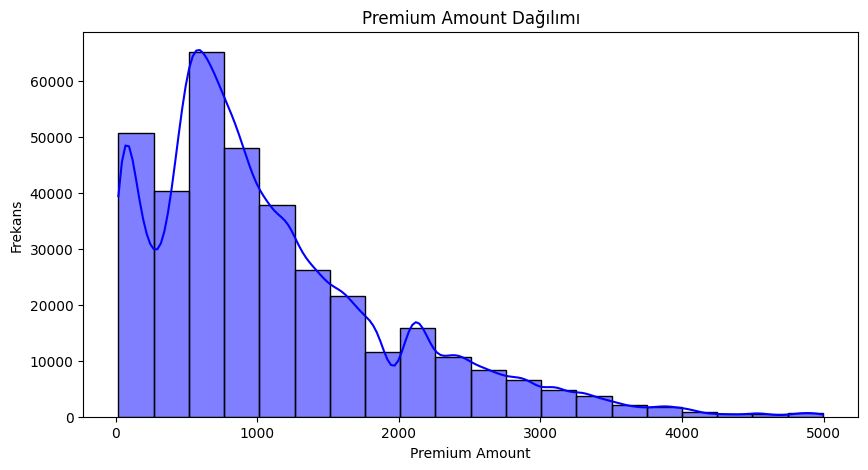

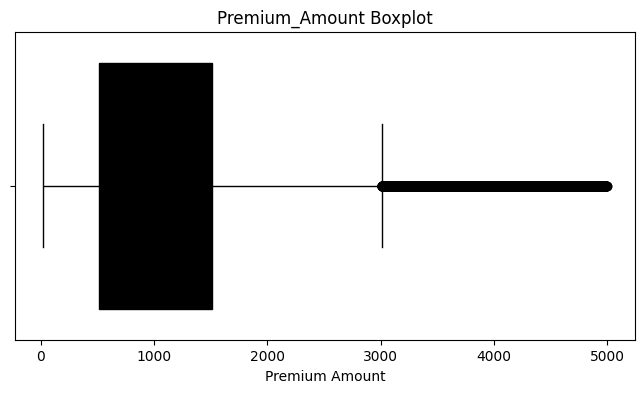

In [44]:
def premium_amount_eda(df):
    print("----- Premium Amount İstatistikleri -----")
    print(df['Premium Amount'].describe())

    print("\n----- Eksik Değer Sayısı -----")
    print(df['Premium Amount'].isnull().sum())

    # Dağılım grafiği (Histogram)
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Premium Amount'], bins=20, kde=True, color='blue')
    plt.title("Premium Amount Dağılımı")
    plt.xlabel("Premium Amount")
    plt.ylabel("Frekans")
    plt.show()


    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df['Premium Amount'], color='black')
    plt.title("Premium_Amount Boxplot")
    plt.xlabel("Premium Amount")
    plt.show()

premium_amount_eda(df)

In [77]:
def top_correlated_features(df, target='Premium Amount', top_n=3):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    correlations = df[numeric_columns].corr()[target].drop(target)
    top_features = correlations.abs().sort_values(ascending=False).head(top_n)
    print("\n----- En Yüksek Korelasyona Sahip Değişkenler -----")
    print(top_features)
    return top_features
top_correlated_features(df)


----- En Yüksek Korelasyona Sahip Değişkenler -----
Previous Claims      0.045865
Credit Score         0.026266
Customer Feedback    0.017530
Name: Premium Amount, dtype: float64


,Premium Amount
Previous Claims,0.045865
Credit Score,0.026266
Customer Feedback,0.017530


In [41]:
y=df["Premium Amount"]
x=df.drop("Premium Amount",axis=1)

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
x_train.shape

(591824, 20)

In [52]:
x_test

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
277565,1477565,19.0,1,44690.0,2,4.0,1,2,23.671661,2,0,NaN,15.0,507.0,6.0,80450,3,0,1,0
148287,148287,61.0,0,66568.0,0,4.0,1,3,48.839850,1,2,0.0,13.0,437.0,7.0,113925,0,0,3,2
48967,48967,31.0,1,30489.0,2,1.0,2,0,28.030323,2,2,1.0,6.0,494.0,3.0,104142,3,0,3,1
324499,324499,26.0,0,70637.0,1,3.0,2,1,46.786216,1,0,1.0,2.0,575.0,1.0,89220,3,1,0,1
269562,269562,58.0,1,65661.0,1,0.0,3,1,31.614838,0,1,NaN,15.0,355.0,5.0,5560,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131623,1331623,41.0,0,37188.0,1,0.0,2,2,8.782228,1,1,NaN,8.0,518.0,3.0,84847,0,0,1,1
351651,1551651,60.0,1,5050.0,2,2.0,3,0,28.919493,0,0,1.0,3.0,629.0,9.0,144820,2,0,2,2
261939,261939,56.0,1,15881.0,2,1.0,2,3,NaN,2,0,1.0,10.0,678.0,3.0,127924,1,0,3,2
225439,225439,41.0,1,56958.0,0,3.0,3,1,21.002783,2,1,1.0,17.0,602.0,1.0,104143,2,1,3,2


In [71]:
y_train.shape

(591824,)

In [66]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")  # Ortalamayla doldurmak için
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)


In [65]:
x_train = x_train.fillna(x_train.mean())
categorical_columns = x_train.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    x_train[column] = x_train[column].fillna(x_train[column].mode()[0])
x_test = x_test.fillna(x_train.mean())
for column in categorical_columns:
    x_test[column] = x_test[column].fillna(x_train[column].mode()[0])


In [58]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [75]:
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# Apply the same imputation to y_test
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).flatten()

lr = LinearRegression()
# Use the imputed y_train for training
lr.fit(x_train_imputed, y_train_imputed)
lr.score(x_test_imputed, y_test_imputed)

0.0014389412947335423

In [80]:
mean_premium_amount = df['Premium Amount'].mean()
mean_premium_amount

1103.0324403879192

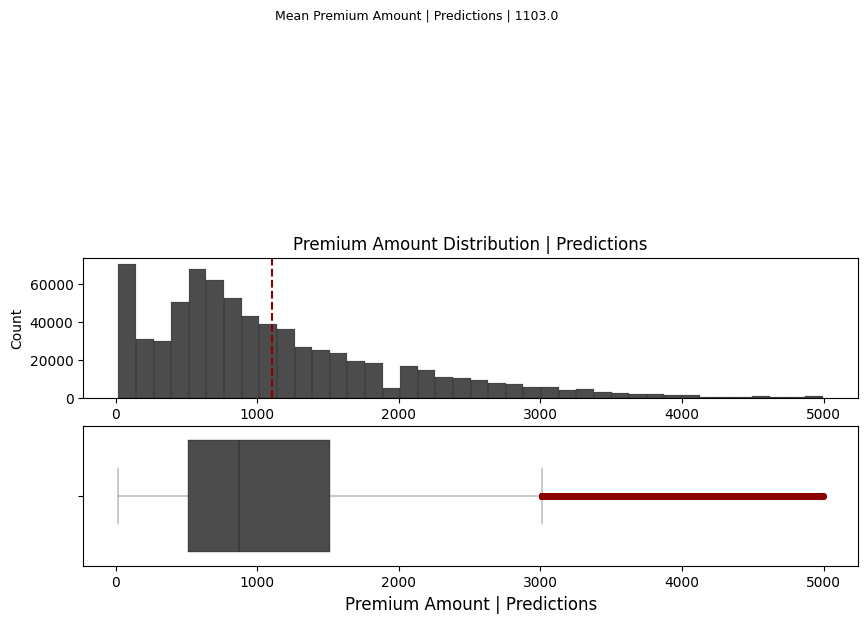

In [82]:
mean_premium_amount = df["Premium Amount"].mean().squeeze()

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 4))

sns.histplot(
    data=df, x="Premium Amount", color="black", bins=40, alpha=0.7, lw=0.1, ax=ax1
)

sns.boxplot(
    data=df,
    x="Premium Amount",
    color="black",
    linewidth=0.3,
    flierprops=dict(
        marker="o", markersize=4, markerfacecolor="darkred", markeredgecolor="darkred"
    ),
    boxprops=dict(alpha=0.7),
    ax=ax2,
)
ax2.set_title("")
ax2.set_xlabel("Premium Amount | Predictions", fontsize=12)

ax1.set_title("Premium Amount Distribution | Predictions", fontsize=12)
ax1.set_xlabel("")

ax1.axvline(x=mean_premium_amount, color="darkred", ls="--", lw=1.5)
ax1.text(
    mean_premium_amount + 20,
    200000,
    "Mean Premium Amount | Predictions | " + str(mean_premium_amount.round(0)),
    fontsize=9,
    color="black",
)

plt.show()

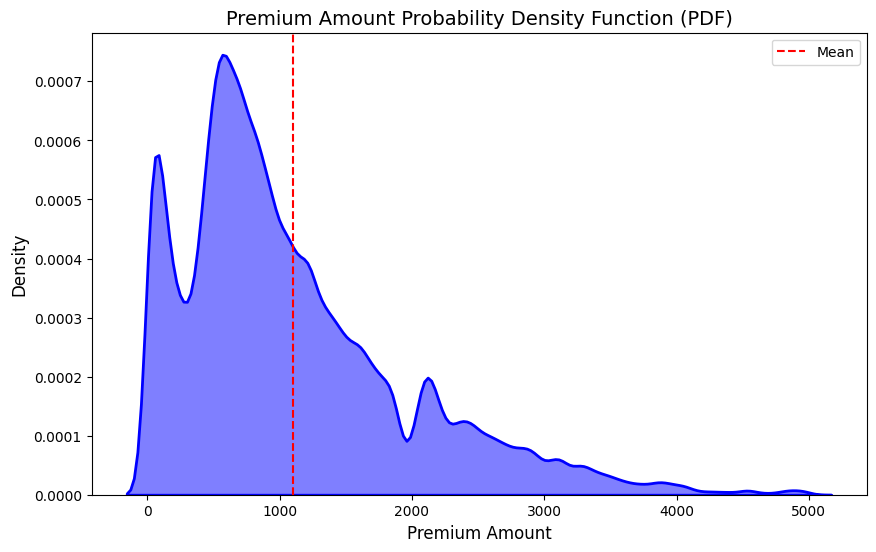

In [83]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="Premium Amount",
    fill=True,
    color="blue",
    alpha=0.5,
    linewidth=2,
)
mean_premium_amount = df["Premium Amount"].mean()
plt.axvline(x=mean_premium_amount, color="red", ls="--", lw=1.5, label="Mean")
plt.title("Premium Amount Probability Density Function (PDF)", fontsize=14)
plt.xlabel("Premium Amount", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.show()